# Handwritten Digit Recognition with Auto-Encoder Enhanced Neural Networks

## Introduction

This project explores the development and application of autoencoders for image denoising, leveraging neural networks to both compress and reconstruct data. Utilizing the MNIST dataset, which comprises 70,000 labeled images of handwritten digits, we artificially introduce noise to these images and train an autoencoder to cleanse this noise. Post-denoising, a classifier is employed to recognize the digits, evaluating its accuracy on both the original noisy images and the purified outputs. This endeavor not only offers practical experience with autoencoders and image denoising techniques but also delves into foundational deep learning concepts, including neural networks and unsupervised learning.

Key technologies used include:
- TensorFlow and Keras for building the neural network
- NumPy for numerical operations
- Matplotlib for visualizing the results

## Importing Libraries

In [1]:
#python modules
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Data Preprocessing


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert the images to float32 and normalize them
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

# reshape the images to a 4-dimensional tensor with shape (samples, width, height, channels)
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

11490434/11490434 [==============================] - 0s 0us/step


## Adding Noise to the Image

In [3]:
# add noise to the training and testing images
noise_factor = 0.9
x_train_noisy = x_train + np.random.rand(60000, 28 * 28) * noise_factor
x_test_noisy = x_test + np.random.rand(10000, 28 * 28) * noise_factor

# clip the values of the noisy images to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
def plot(x, p, labels = False):
    """
    Plots a set of images along with their predicted labels.

    Parameters
    ----------
    x : np.ndarray
        A numpy array of shape (n_images, height, width) containing the images to be plotted.
    p : np.ndarray, optional
        A numpy array of shape (n_images, num_classes) containing the predicted labels for each image, by default None.
    labels : bool, optional
        A boolean indicating whether to plot the predicted labels alongside the images, by default False.

    Returns
    -------
    None
    """
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return

### Plot some clean images

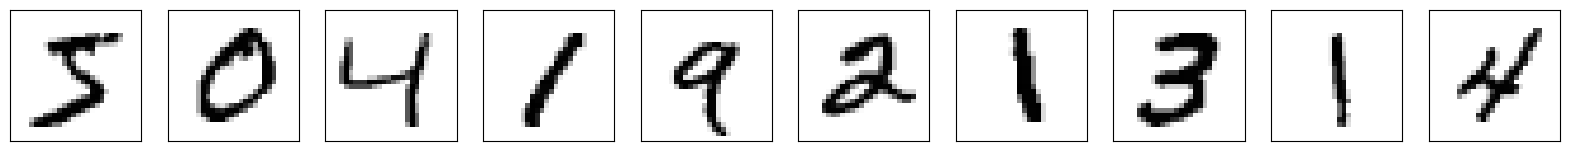

In [6]:
plot(x_train, None)

### Plot some noisy images

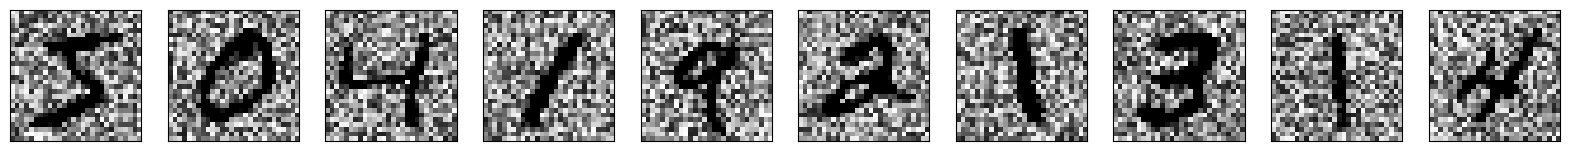

In [7]:
plot(x_train_noisy, None)

## Building and Training a Classifier


In [8]:
# define the model
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(28 * 28,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# compile the model
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
118/118 [==============================] - 5s 31ms/step - loss: 0.4261 - accuracy: 0.8844
Epoch 2/3
118/118 [==============================] - 4s 35ms/step - loss: 0.1541 - accuracy: 0.9554
Epoch 3/3
118/118 [==============================] - 2s 18ms/step - loss: 0.1031 - accuracy: 0.9699


In [9]:
# evaluate the model
loss, accuracy = classifier.evaluate(x_test, y_test)
print('Accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1012 - accuracy: 0.9688
Accuracy: 0.9688000082969666


In [10]:
# evaluate the model on the noisy images
loss, accuracy = classifier.evaluate(x_test_noisy, y_test)
print('Accuracy on noisy images:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 7.7899 - accuracy: 0.2077
Accuracy on noisy images: 0.2076999992132187


## Building the Autoencoder


In [11]:
# define the input image
input_image = Input(shape=(28 * 28,))

# encode the input image
encoded = Dense(128, activation='relu')(input_image)

# decode the encoded image
decoded = Dense(28 * 28, activation='sigmoid')(encoded)

# define the autoencoder model
autoencoder = Model(input_image, decoded)

# compile the autoencoder
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

##  Training the Autoencoder


In [12]:
# train the autoencoder
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100, batch_size=512,
    validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print('Training is complete!')

0.245 _ 0.197 _ 0.172 _ 0.157 _ 0.146 _ 0.138 _ 0.131 _ 0.126 _ 0.122 _ 0.118 _ 0.115 _ 0.113 _ 0.111 _ 0.109 _ 0.107 _ 0.106 _ 0.105 _ 0.104 _ 0.103 _ 0.102 _ 0.102 _ 0.101 _ 0.100 _ 0.100 _ 0.099 _ 0.099 _ 0.099 _ 0.098 _ 0.098 _ 0.098 _ 0.097 _ 0.097 _ 0.097 _ 0.097 _ 0.096 _ 0.096 _ 0.096 _ 0.096 _ 0.096 _ 0.095 _ 0.095 _ 0.095 _ 0.095 _ 0.095 _ 0.095 _ 0.095 _ 0.095 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.094 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ 0.093 _ Training is complete!


## Predict Denoised Images

In [13]:
# predict the denoised images
predictions = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


### Plot some noisy images

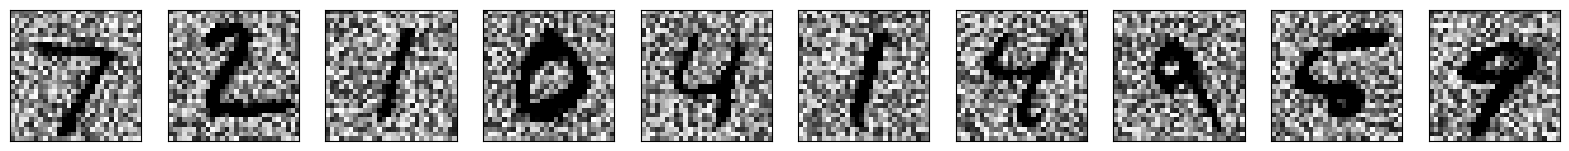

In [14]:
plot(x_test_noisy, None)

### Plot some denoised images

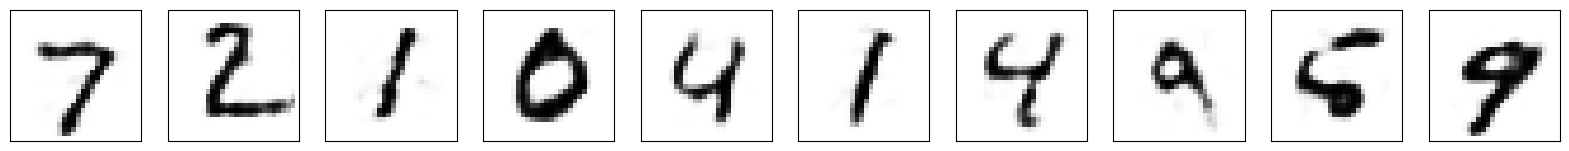

In [15]:
plot(predictions, None)

In [16]:
# evaluate the model on the denoised images
loss, accuracy = classifier.evaluate(predictions, y_test)
print('Accuracy on denoised images:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1447 - accuracy: 0.9553
Accuracy on denoised images: 0.955299973487854


## Composite Model


In [17]:
# define the input image
input_image = Input(shape=(28 * 28,))

# encode the input image
x = autoencoder(input_image)

# decode the encoded image
y = classifier(x)

# define the denoise and classify model
denoise_and_classify = Model(input_image, y)

In [18]:
# predict the denoised and classified images
predictions = denoise_and_classify.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


### Noisy Image Classification

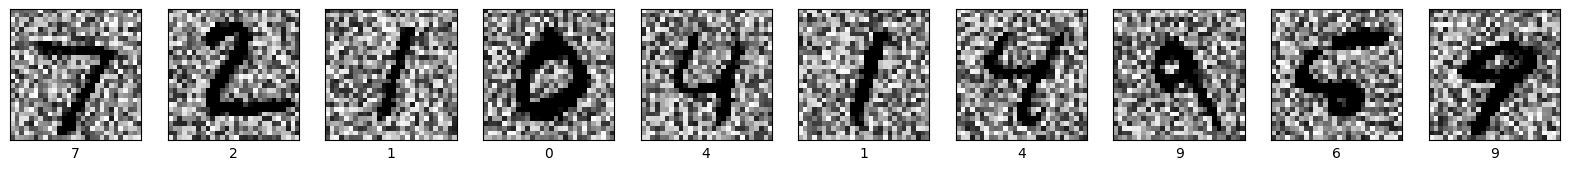

In [19]:
plot(x_test_noisy, predictions, True)

### Denoised Image Classification

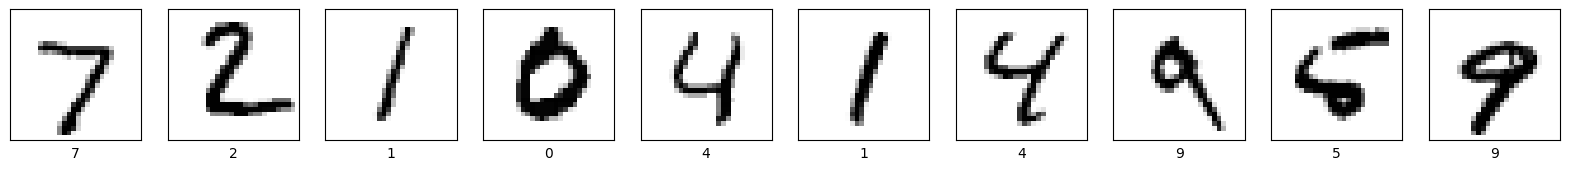

In [20]:
plot(x_test, to_categorical(y_test), True)